In [2]:
import os, shutil
import cv2
import glob
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

Download Dataset and Unzip the file

In [6]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 28.7MB/s]


In [7]:
!unzip "/content/breast-cancer-wisconsin-data.zip"

Archive:  /content/breast-cancer-wisconsin-data.zip
  inflating: data.csv                


Read DataSet

In [103]:
import pandas as pd

df = pd.read_csv("/content/data.csv")
import pandas as pd
df.drop('Unnamed: 32', inplace=True, axis=1)
df.drop('id', inplace=True, axis=1)

df.diagnosis[df.diagnosis == 'M'] = 1
df.diagnosis[df.diagnosis == 'B'] = 0

print(len(df.columns))
df.head()

31


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [104]:
import numpy as np

data = np.array(df)

data

array([[1, 17.99, 10.38, ..., 0.2654, 0.4601, 0.1189],
       [1, 20.57, 17.77, ..., 0.186, 0.275, 0.08902],
       [1, 19.69, 21.25, ..., 0.243, 0.3613, 0.08758],
       ...,
       [1, 16.6, 28.08, ..., 0.1418, 0.2218, 0.0782],
       [1, 20.6, 29.33, ..., 0.265, 0.4087, 0.124],
       [0, 7.76, 24.54, ..., 0.0, 0.2871, 0.07039]], dtype=object)

In [105]:
x = data[:, 1:]
y = data[:, 0:1]
y = y.flatten()

print("X shape is :",x.shape)
print("Y shape is :",y.shape)

X shape is : (569, 30)
Y shape is : (569,)


Train test split

In [106]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 30, shuffle=True)

x_train = np.asarray(x_train).astype('float32')
x_test = np.asarray(x_test).astype('float32')
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (455, 30)
x_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


Normalization

In [107]:
m = x_train.mean(axis = 0)
s = x_train.max(axis = 0)

x_train = (x_train - m) / s
x_test = (x_test - m) / s


Use Sklearn for Normalization

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Make the Model

In [108]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation="tanh", input_shape=(30,)))
model.add(Dense(32, activation="tanh"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                1984      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________


Train the Mode

In [109]:
history = model.fit(x_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
12/12 [==============================] - 1s 21ms/step - loss: 0.5162 - accuracy: 0.8324 - val_loss: 0.3739 - val_accuracy: 0.9670
Epoch 2/30
12/12 [==============================] - 0s 6ms/step - loss: 0.3288 - accuracy: 0.9066 - val_loss: 0.2577 - val_accuracy: 0.9670
Epoch 3/30
12/12 [==============================] - 0s 5ms/step - loss: 0.2420 - accuracy: 0.9231 - val_loss: 0.1929 - val_accuracy: 0.9670
Epoch 4/30
12/12 [==============================] - 0s 6ms/step - loss: 0.1908 - accuracy: 0.9313 - val_loss: 0.1526 - val_accuracy: 0.9670
Epoch 5/30
12/12 [==============================] - 0s 4ms/step - loss: 0.1564 - accuracy: 0.9396 - val_loss: 0.1286 - val_accuracy: 0.9670
Epoch 6/30
12/12 [==============================] - 0s 4ms/step - loss: 0.1331 - accuracy: 0.9505 - val_loss: 0.1067 - val_accuracy: 0.9780
Epoch 7/30
12/12 [==============================] - 0s 4ms/step - loss: 0.1144 - accuracy: 0.9588 - val_loss: 0.0939 - val_accuracy: 0.9780
Epoch 8/30
12/12 [=

Test the Model

In [110]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.0644 - accuracy: 0.9825


[0.06436041742563248, 0.9824561476707458]

Plot the graph

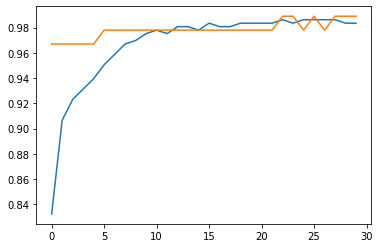

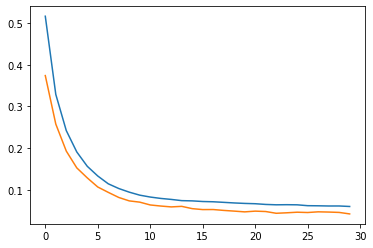

In [111]:
import matplotlib.pyplot as plt


plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

In [112]:
model.predict(x_test[0:10, ::])

array([[9.1558003e-01],
       [9.9950528e-01],
       [3.2249093e-04],
       [9.9465513e-01],
       [1.2207829e-04],
       [9.9998009e-01],
       [1.9958615e-04],
       [7.5501521e-05],
       [1.5574694e-04],
       [5.0282478e-04]], dtype=float32)